In [2]:
import numpy as np
import pandas as pd

%pylab inline
import plotly.graph_objects as go

from sklearn.cluster import KMeans

Populating the interactive namespace from numpy and matplotlib


In [3]:
img = plt.imread('/content/using_kmeans_for_color_compression_tulips_photo.jpg')

(320, 240, 3)


(-0.5, 239.5, 319.5, -0.5)

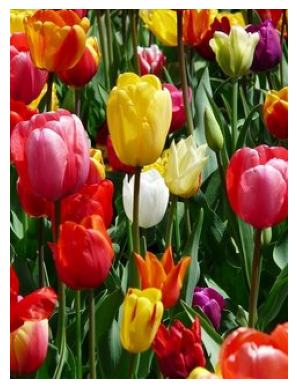

In [5]:
print(img.shape)
plt.imshow(img)
plt.axis('off')
# 320 vertical pixes, 240 horizontal pixels

In [6]:
# Convert image pixels to array
img_flat = img.reshape(img.shape[0]*img.shape[1],3)
img_flat[:5,:]

array([[211, 197,  38],
       [199, 181,  21],
       [178, 154,   0],
       [185, 152,   0],
       [184, 145,   0]], dtype=uint8)

In [7]:
# Each row is a pixel's 3 RGB colour values
img_flat.shape

(76800, 3)

In [13]:
img_flat_df = pd.DataFrame(img_flat, columns = ['r', 'g', 'b'])
img_flat_df.head()

r    g   b
0  211  197  38
1  199  181  21
2  178  154   0
3  185  152   0
4  184  145   0

In [14]:
trace = go.Scatter3d(x = img_flat_df.r,
                     y = img_flat_df.g,
                     z = img_flat_df.b,
                     mode='markers',
                     marker=dict(size=1,
                                 color=['rgb({},{},{})'.format(r,g,b) for r,g,b
                                        in zip(img_flat_df.r.values,
                                               img_flat_df.g.values,
                                               img_flat_df.b.values)],
                                 opacity=0.5))

data = [trace]

layout = go.Layout(margin=dict(l=0,
                               r=0,
                               b=0,
                               t=0),
                               )

fig = go.Figure(data=data, layout=layout)
fig.update_layout(scene = dict(
                    xaxis_title='R',
                    yaxis_title='G',
                    zaxis_title='B'),
                  )
fig.show()

# Intense colour = concentration of dots

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



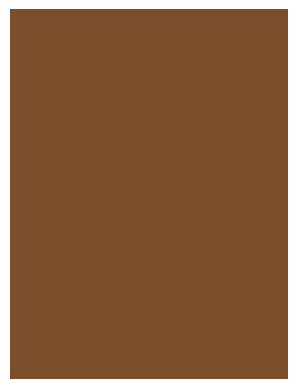

In [16]:
# Create instance
kmeans = KMeans(n_clusters = 1, random_state = 42).fit(img_flat)

# Copy image for modification
img_flat1 = img_flat.copy()

# Replace rows with closest cluster center
for i in np.unique(kmeans.labels_):
  img_flat1[kmeans.labels_==i,:] = kmeans.cluster_centers_[i]

# For display
img1 = img_flat1.reshape(img.shape)

plt.imshow(img1)
plt.axis('off');

# Algorithm randomly places centroid. Only one centroid being used here, so
# it updates to the mean center of all points. Then it replaces with average
# colour

In [26]:
# 3-cluster model
kmeans3 = KMeans(n_clusters = 3, random_state = 42).fit(img_flat)

np.unique(kmeans3.labels_)

centers = kmeans3.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [27]:
def show_swatch(RGB_value):
    '''
    Takes in an RGB value and outputs a color swatch
    '''
    R, G, B = RGB_value
    rgb = [[np.array([R,G,B]).astype('uint8')]]
    plt.figure()
    plt.imshow(rgb)
    plt.axis('off');

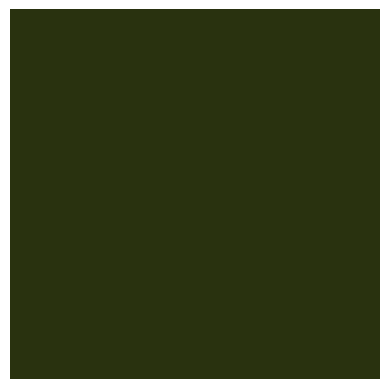

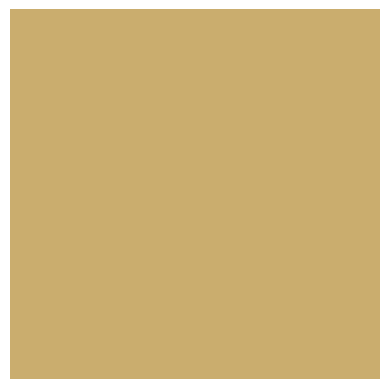

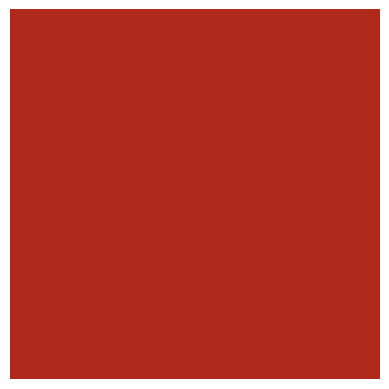

In [29]:
for pixel in centers:
    show_swatch(pixel)

# 3 dominant colours (average) from picture using K-means

In [33]:
def cluster_image(k, img=img):
  img_flat = img.reshape(img.shape[0]*img.shape[1], 3)
  kmeans = KMeans(n_clusters = k, random_state = 42).fit(img_flat)
  new_img = img_flat.copy()

  for i in np.unique(kmeans.labels_):
    new_img[kmeans.labels_ == 1, :] = kmeans.cluster_centers_[i]

  new_img = new_img.reshape(img.shape)

  return plt.imshow(new_img), plt.axis('off');

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



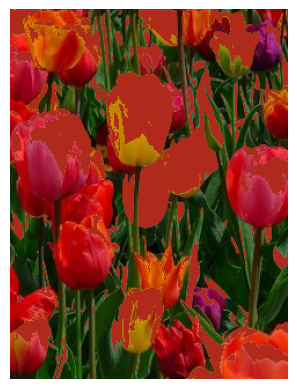

In [34]:
cluster_image(3);

In [39]:
img_flat_df['cluster'] = kmeans3.labels_
img_flat_df.head()

r    g   b  cluster
0  211  197  38        1
1  199  181  21        1
2  178  154   0        1
3  185  152   0        2
4  184  145   0        2

In [40]:
series_conversion = {0: 'rgb' +str(tuple(kmeans3.cluster_centers_[0])),
                     1: 'rgb' +str(tuple(kmeans3.cluster_centers_[1])),
                     2: 'rgb' +str(tuple(kmeans3.cluster_centers_[2])),
                     }
series_conversion

{0: 'rgb(41.09804643176976, 50.263164351212204, 15.917195694185057)',
 1: 'rgb(202.72919663036436, 173.32674131908857, 110.0638997329068)',
 2: 'rgb(176.334883720922, 42.33569261880957, 27.324084934274705)'}

In [41]:
img_flat_df['cluster'] = img_flat_df['cluster'].map(series_conversion)
img_flat_df.head()

r    g   b                                            cluster
0  211  197  38  rgb(202.72919663036436, 173.32674131908857, 11...
1  199  181  21  rgb(202.72919663036436, 173.32674131908857, 11...
2  178  154   0  rgb(202.72919663036436, 173.32674131908857, 11...
3  185  152   0  rgb(176.334883720922, 42.33569261880957, 27.32...
4  184  145   0  rgb(176.334883720922, 42.33569261880957, 27.32...

In [43]:
# Cluster viz

trace = go.Scatter3d(x = img_flat_df.r,
                     y = img_flat_df.g,
                     z = img_flat_df.b,
                     mode='markers',
                     marker=dict(size=1,
                                 color=img_flat_df.cluster,
                                 opacity=1))

data = trace

layout = go.Layout(margin=dict(l=0,
                               r=0,
                               b=0,
                               t=0))

fig = go.Figure(data=data, layout=layout)
fig.show()